In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import joblib

In [2]:
#Load the preprocessed data
x_train = pd.read_csv("input/x_train.csv")
x_test = pd.read_csv("input/x_test.csv")
y_train = pd.read_csv("input/y_train.csv")
y_test = pd.read_csv("input/y_test.csv")

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=0)
extra_trees.fit(x_train, y_train)
adaboost = AdaBoostClassifier(n_estimators=100, random_state=0)
adaboost.fit(x_train, y_train)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
# This model will take a long time to train if not loaded from disk
try:
  gbrt = joblib.load('./model/gbrt994.pkl')
except:
  gbrt = GradientBoostingClassifier(n_estimators=10000,max_depth=8)
random_forest = RandomForestClassifier(n_jobs = -1)
random_forest.fit(x_train, y_train)

/tmp/ipykernel_60516/61896414.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_trees.fit(x_train, y_train)
/home/user1/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user1/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/tmp/ipykernel_60516/61896414.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [4]:
classifiers = [extra_trees,adaboost,knn,gbrt,random_forest]
classifier_names = ["Extra Trees","Adaboost","KNN","Gradient Boosting","Random Forest"]

In [5]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels

# https://stackoverflow.com/questions/45003577/how-to-output-classification-report-of-sklearn-into-a-csv-file
def save_report(y_test,prediction,full_path="test_pandas.csv"):

    labels = unique_labels(y_test, prediction)
    precision, recall, f_score, support = precision_recall_fscore_support(y_test,
                                                                          prediction,
                                                                          labels=labels,
                                                                          average=None)
    results_pd = pd.DataFrame({"class": labels,
                               "precision": precision,
                               "recall": recall,
                               "f1-score": f_score,
                               "support": support
                               })
    results_pd = results_pd.round(3)
    results_pd.to_csv(full_path, index=False)


In [8]:
predictions = []
for classifier,classifier_name in zip(classifiers,classifier_names):
    prediction = classifier.predict(x_test)
    predictions.append(prediction)
    report_name = "report/csv/" + classifier_name + ".csv"
    save_report(y_test,prediction,report_name)


   class  precision    recall  f1-score  support
0      0   0.902320  0.971723  0.935736    69244
1      1   0.947185  0.828203  0.883707    42399
   class  precision    recall  f1-score  support
0      0   0.842527  0.975579  0.904185    69244
1      1   0.946256  0.702210  0.806168    42399


/home/user1/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


   class  precision    recall  f1-score  support
0      0   0.865269  0.908555  0.886384    69244
1      1   0.837370  0.768957  0.801707    42399
   class  precision    recall  f1-score  support
0      0   0.992290  0.998065  0.995169    69244
1      1   0.996809  0.987335  0.992049    42399
   class  precision    recall  f1-score  support
0      0   0.922140  0.990671  0.955178    69244
1      1   0.982659  0.863393  0.919173    42399


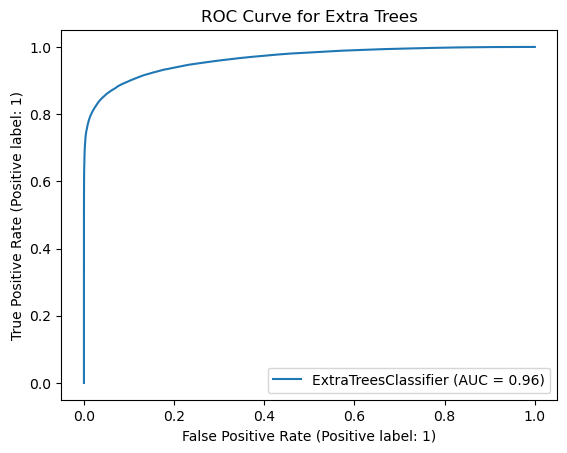

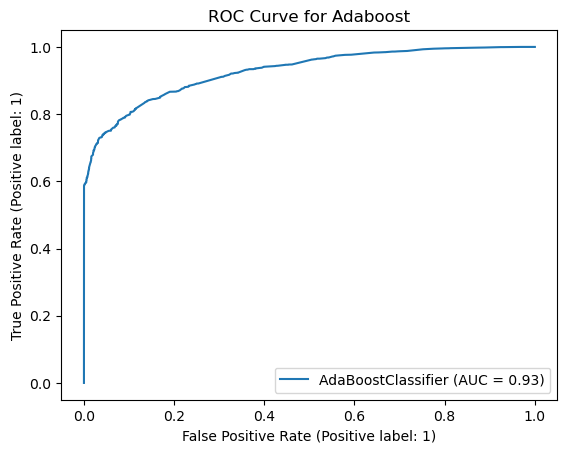

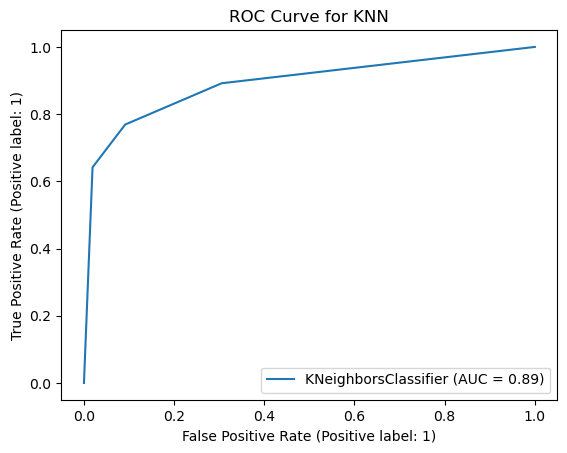

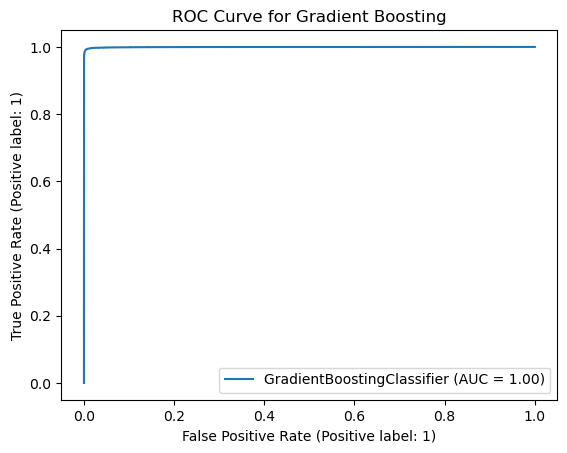

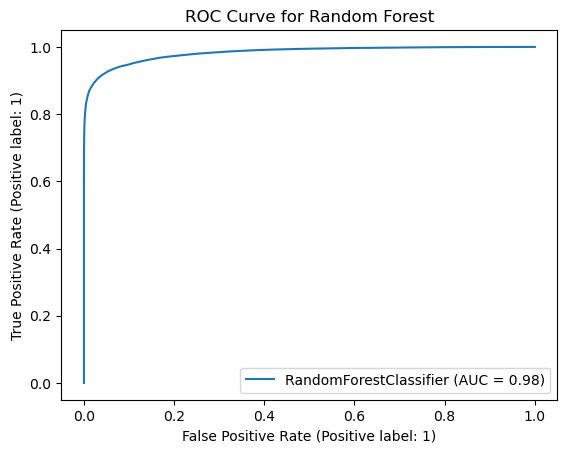

In [20]:
from sklearn.metrics import RocCurveDisplay
for classifier,classifier_name in zip(classifiers,classifier_names):
  roc = RocCurveDisplay.from_estimator(classifier,x_test,y_test)
  title = "ROC Curve for " + classifier_name
  plt.title(title)
  plt.savefig(classifier_name)
  plt.show()


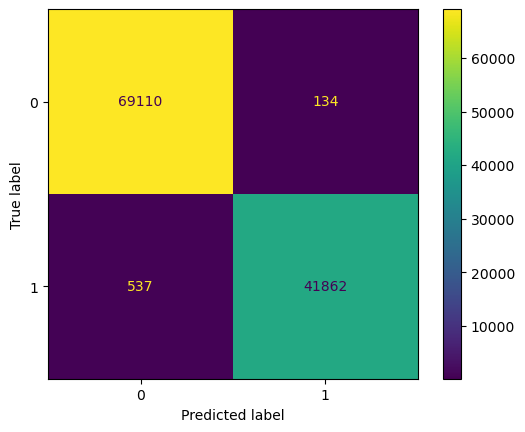

In [ ]:
#The confusion matrix for the gbrt model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = gbrt.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()